In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
sns.set()

In [2]:
#read data
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#jumlah baris dan kolom

print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 891
Jumlah kolom: 12


In [4]:
#menampilkan tipe data per kolom
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
#statistik deskriptif

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#cek missing value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#groupby sex
df_embarked_survived = df[['Embarked','Survived']]
df_embarked_survived = df.groupby(['Embarked', 'Survived']).size().reset_index(name='Count')
df_embarked_survived

,Embarked,Survived,Count
0,C,0,75
1,C,1,93
2,Q,0,47
3,Q,1,30
4,S,0,427
5,S,1,217


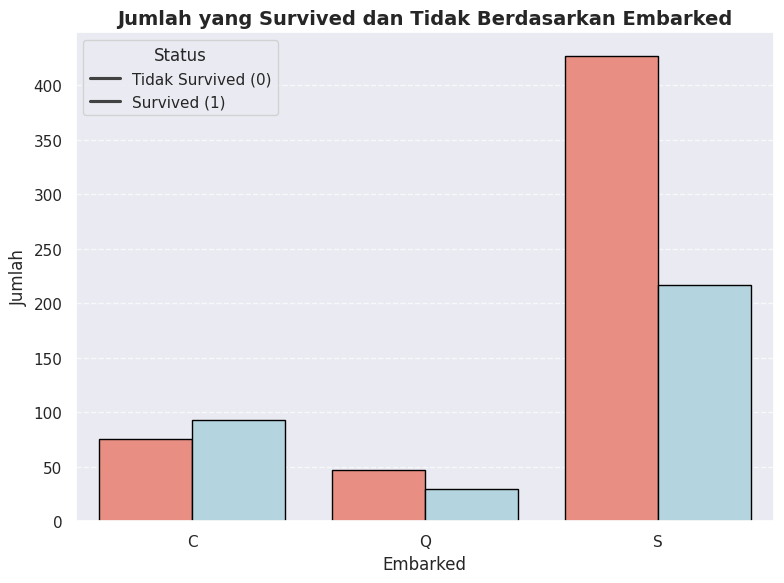

In [8]:

# Membuat bar plot
plt.figure(figsize=(8, 6))  # Mengatur ukuran figure
sns.barplot(x='Embarked', y='Count', hue='Survived', data=df_embarked_survived, palette=['salmon', 'lightblue'], edgecolor='black')

# Menambahkan judul dan label
plt.title('Jumlah yang Survived dan Tidak Berdasarkan Embarked', fontsize=14, weight='bold')
plt.xlabel('Embarked', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menyesuaikan legenda
plt.legend(title='Status', labels=['Tidak Survived (0)', 'Survived (1)'], loc='upper left')

# Menambahkan garis grid untuk sumbu Y agar lebih mudah dibaca
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mengatur jarak tata letak
plt.tight_layout()

# Menampilkan plot
plt.show()

In [9]:
#cek unik data sibsp
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [10]:
#groupby sibsp
df_sibsp_survived = df[['SibSp','Survived']]
df_sibsp_survived = df.groupby(['SibSp', 'Survived']).size().reset_index(name='Count')
df_sibsp_survived

,SibSp,Survived,Count
0,0,0,398
1,0,1,210
2,1,0,97
3,1,1,112
4,2,0,15
5,2,1,13
6,3,0,12
7,3,1,4
8,4,0,15
9,4,1,3


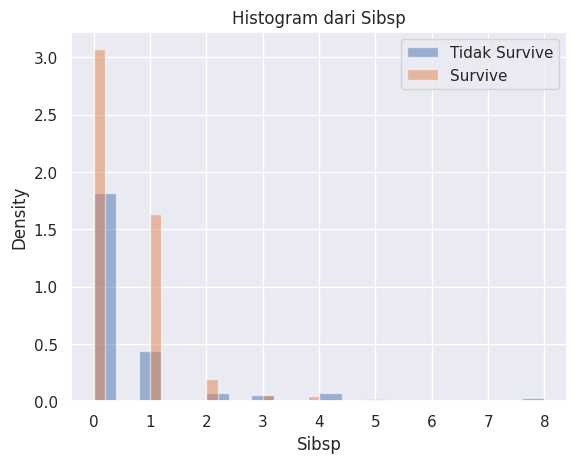

In [11]:
group_0 = [x for x, y in zip(df['SibSp'], df['Survived']) if y == 0]
group_1 = [x for x, y in zip(df['SibSp'], df['Survived']) if y == 1]

plt.hist(group_0, bins=20, alpha=0.5, label='Tidak Survive', density=True)
plt.hist(group_1, bins=20, alpha=0.5, label='Survive', density=True)
plt.xlabel("Sibsp")
plt.ylabel("Density")
plt.title("Histogram dari Sibsp")
plt.legend()
plt.show()


In [12]:
#cek unik data parch
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [13]:
#groupby sibsp
df_sibsp_survived = df[['Parch','Survived']]
df_sibsp_survived = df.groupby(['Parch', 'Survived']).size().reset_index(name='Count')
df_sibsp_survived

,Parch,Survived,Count
0,0,0,445
1,0,1,233
2,1,0,53
3,1,1,65
4,2,0,40
5,2,1,40
6,3,0,2
7,3,1,3
8,4,0,4
9,5,0,4


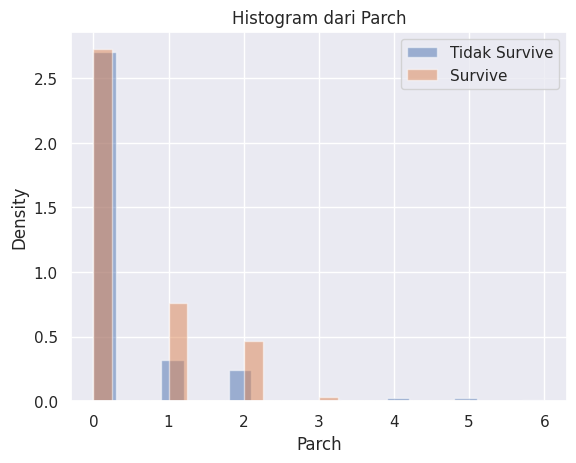

In [14]:
group_0 = [x for x, y in zip(df['Parch'], df['Survived']) if y == 0]
group_1 = [x for x, y in zip(df['Parch'], df['Survived']) if y == 1]

plt.hist(group_0, bins=20, alpha=0.5, label='Tidak Survive', density=True)
plt.hist(group_1, bins=20, alpha=0.5, label='Survive', density=True)
plt.xlabel("Parch")
plt.ylabel("Density")
plt.title("Histogram dari Parch")
plt.legend()
plt.show()


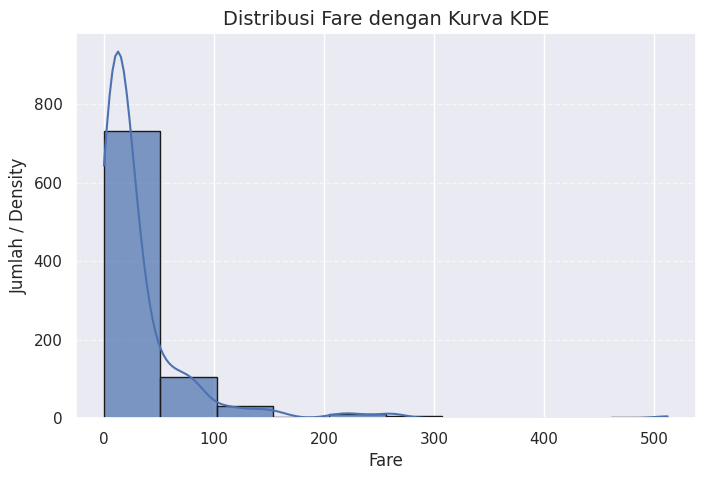

In [15]:
#distribusi fare
# Membuat plot distribusi dengan histogram dan KDE
plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'], bins=10, kde=True, edgecolor='k', alpha=0.7)

# Menambahkan label dan grid
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Jumlah / Density', fontsize=12)
plt.title('Distribusi Fare dengan Kurva KDE', fontsize=14)

plt.show()


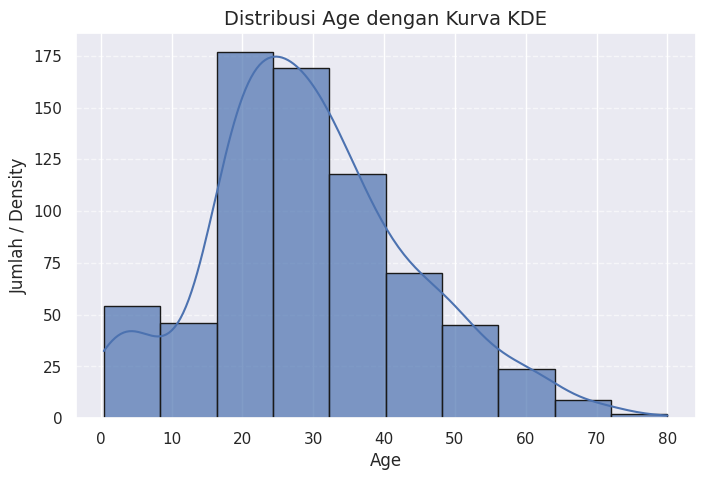

In [16]:
#distribusi age
# Membuat plot distribusi dengan histogram dan KDE
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=10, kde=True, edgecolor='k', alpha=0.7)

# Menambahkan label dan grid
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Jumlah / Density', fontsize=12)
plt.title('Distribusi Age dengan Kurva KDE', fontsize=14)

plt.show()


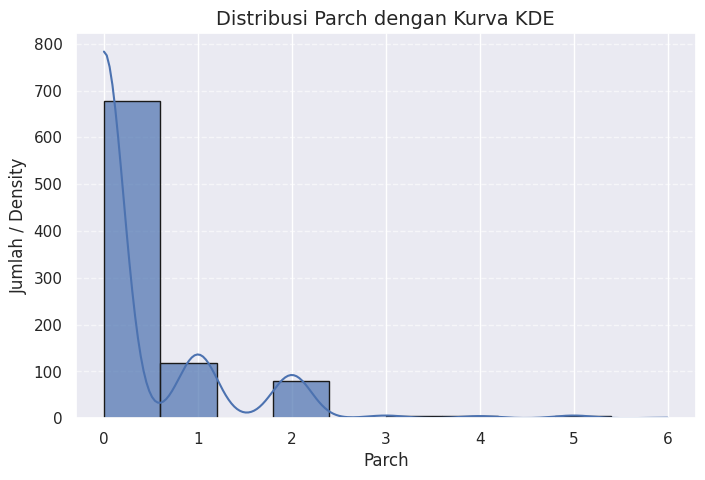

In [17]:
#distribusi Parch
# Membuat plot distribusi dengan histogram dan KDE
plt.figure(figsize=(8, 5))
sns.histplot(df['Parch'], bins=10, kde=True, edgecolor='k', alpha=0.7)

# Menambahkan label dan grid
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xlabel('Parch', fontsize=12)
plt.ylabel('Jumlah / Density', fontsize=12)
plt.title('Distribusi Parch dengan Kurva KDE', fontsize=14)

plt.show()


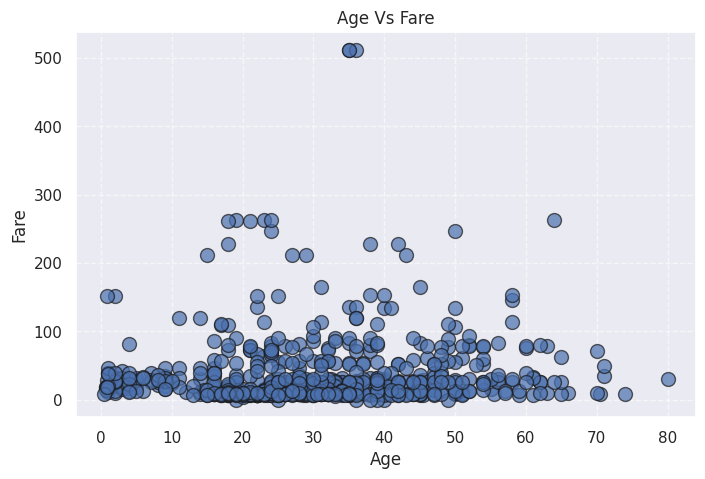

In [18]:
#scatterplot age dengan fare
plt.figure(figsize=(8, 5))  # Ukuran plot
plt.scatter(df['Age'], df['Fare'], alpha=0.7, edgecolors='k', s=100)

plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Age Vs Fare")

# Menampilkan grid untuk membantu pembacaan
plt.grid(True, linestyle='--', alpha=0.6)

# Menampilkan plot
plt.show()

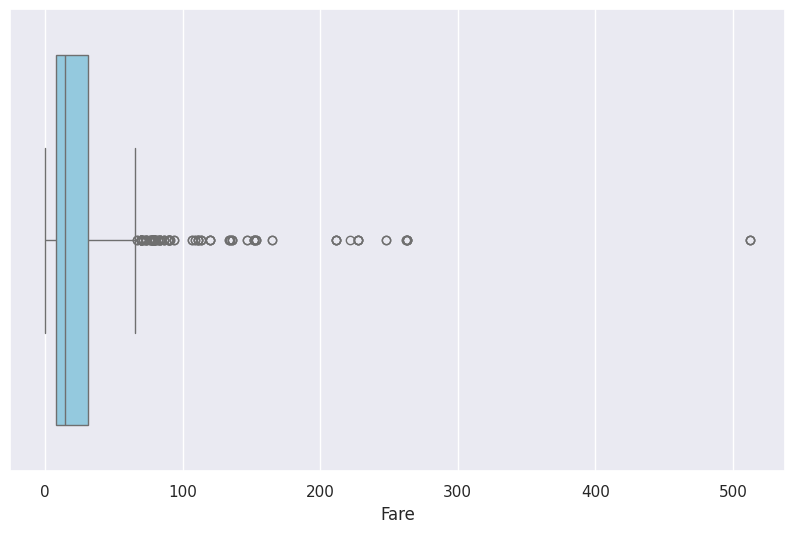

In [19]:
#cek outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fare', data=df, color='skyblue')
plt.show()

In [20]:
#ccek duplikat
# Mengecek apakah ada baris duplikat
duplicates = df.duplicated()

# Menampilkan jumlah baris duplikat
print(f"Jumlah baris duplikat: {duplicates.sum()}")

# Menampilkan baris-baris yang duplikat
df_duplicates = df[df.duplicated()]
print(df_duplicates)


Jumlah baris duplikat: 0
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [21]:
#drop data tidak relevan
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [22]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [23]:
#isi missing value age dengan mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [24]:
#isi missing value embarked dengan modus
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [25]:
#cek missing value
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [26]:
#encode data kategorikal sex
sex_dict = {
    'male':0,
    'female':1
}

df['Sex'] = df['Sex'].replace(sex_dict)
df

/tmp/ipykernel_4228/4153672042.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace(sex_dict)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,S
1,1,1,1,38.000000,1,0,71.2833,C
2,1,3,1,26.000000,0,0,7.9250,S
3,1,1,1,35.000000,1,0,53.1000,S
4,0,3,0,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,S
887,1,1,1,19.000000,0,0,30.0000,S
888,0,3,1,29.699118,1,2,23.4500,S
889,1,1,0,26.000000,0,0,30.0000,C


In [27]:
#encode data embarked

embarked_dict = {
    'S':0,
    'C':1,
    'Q':2
}

df['Embarked'] = df['Embarked'].replace(embarked_dict)
df

/tmp/ipykernel_4228/440387868.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Embarked'] = df['Embarked'].replace(embarked_dict)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


In [28]:
#siapkan data untuk modeling
X = df.drop('Survived', axis=1)
Y = df['Survived']

In [29]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [30]:
# Inisialisasi StandardScaler
scaler = MinMaxScaler()

# Standarisasi kolom numerik
columns = [col for col in X.columns]  # Kolom yang akan distandarisasi
df[columns] = scaler.fit_transform(df[columns])

print("\nDataFrame setelah standarisasi:")
print(df)



DataFrame setelah standarisasi:
     Survived  Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
0           0     1.0  0.0  0.271174  0.125  0.000000  0.014151       0.0
1           1     0.0  1.0  0.472229  0.125  0.000000  0.139136       0.5
2           1     1.0  1.0  0.321438  0.000  0.000000  0.015469       0.0
3           1     0.0  1.0  0.434531  0.125  0.000000  0.103644       0.0
4           0     1.0  0.0  0.434531  0.000  0.000000  0.015713       0.0
..        ...     ...  ...       ...    ...       ...       ...       ...
886         0     0.5  0.0  0.334004  0.000  0.000000  0.025374       0.0
887         1     0.0  1.0  0.233476  0.000  0.000000  0.058556       0.0
888         0     1.0  1.0  0.367921  0.125  0.333333  0.045771       0.0
889         1     0.0  0.0  0.321438  0.000  0.000000  0.058556       0.5
890         0     1.0  0.0  0.396833  0.000  0.000000  0.015127       1.0

[891 rows x 8 columns]


In [31]:
correlation_matrix = df.corr()
correlation_matrix

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


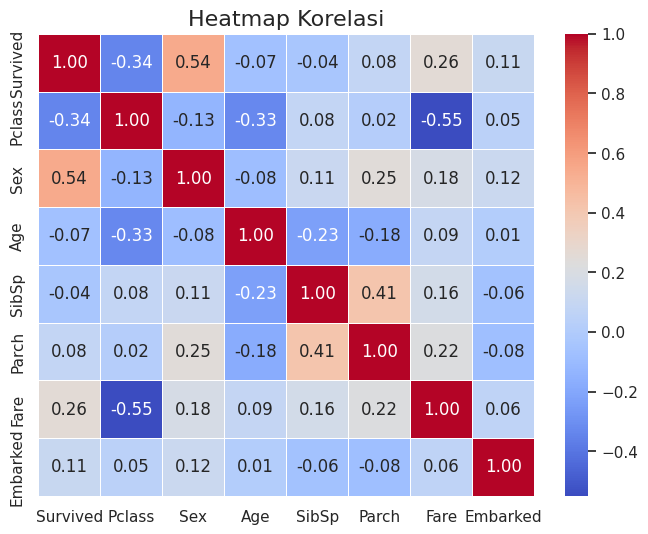

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap Korelasi", fontsize=16)
plt.show()

# Analisa </br>

di dasari pada korelasi, fitur yang berkorelasi kuat dengan target (survived) adalah Sex (0.54) dan Pclass(-0.34)</br>
Survived dengan Sek berkorelasi positif yang artinya jika survived naik maka sex juga akan naik, jika turun maka juga </br>ikut turun . Namun karena survived adalah suatu data biner dan sex juga data biner , karena yang didefenisikan male </br>itu (0) dan female (1), survived (1), yang tidak survived (0), maka male banyak yang tidak survived dan female banyak </br>yang survived. Jika disambungkan pada budaya yang umum kenapa laki-laki lebih banyak yang tidak survived, karena </br>wanita akan diprioritaskan terlebih dahulu untuk diselamatkan. 

disisi lain Pclass dan Survived memiliki korelasi yang negatif, berarti jika survived turun maka pclass naik begitu juga sebaliknya.</br>

Secara keseluruhan antar fitur saling berkaitan lemah atau bahkan hampir tidak ada kaitannya, yang berarti antar fitur saling independen. </br> Implikasi independen fitur ini bisa melatih model machine learning lebih stabil. 